In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%time
# Set your environment in a notebook:
# Set the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Write out the versions of all packages to requirements.txt
!pip freeze >> requirements.txt

# Remove the restriction on Jupyter that limits the columns displayed (the ... in the middle)
# pd.set_option('max_columns',None)
pd.options.display.max_columns = None
# pd.options.display.max_rows = None
# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html#

# Pretty Display of variables.  for instance, you can call df.head() and df.tail() in the same cell and BOTH display w/o print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# List of ALL Magic Commands.  To run a magic command %var  --- i.e.:  %env
%lsmagic
# %env  -- list environment variables
# %%time  -- gives you information about how long a cel took to run
# %%timeit -- runs a cell 100,000 times and then gives you the average time the cell will take to run (can be LONG)
# %pdb -- python debugger

# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

print("\n Numpy: " + np.__version__)
print("\n sklearn: " + sklearn.__version__)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs

 Numpy: 1.23.5

 sklearn: 1.2.2


# Set Environment and Pull all algorithms and Built in Datasets

In [ ]:
import pandas as pd
import sklearn.utils
import sklearn

def get_sklearn_algorithms():
    algorithms = []

    for name, module in sklearn.utils.all_estimators():
        try:
            # Check if the current module is a classifier or regressor.
            # This might not capture all possible classifiers or regressors, but should get most of them.
            if issubclass(module, sklearn.base.ClassifierMixin) or issubclass(module, sklearn.base.RegressorMixin):
                algorithms.append(name)
        except TypeError:
            # Some modules don't work with issubclass() and might throw an error, so we skip them.
            pass

    return algorithms

algorithms_list = get_sklearn_algorithms()
df_algorithms = pd.DataFrame(algorithms_list, columns=["Algorithm"])
df_algorithms.head(500)


In [ ]:
import sklearn.datasets

def get_sklearn_datasets():
    datasets_list = [dataset for dataset in dir(sklearn.datasets) if 'load_' in dataset or 'fetch_' in dataset]
    return datasets_list

datasets = get_sklearn_datasets()
for idx, dataset in enumerate(datasets, 1):
    print(f"{idx}. {dataset}")


# Manual Hyperparameter Tuning

In [ ]:
from sklearn import neighbors
# initialize with default hyperparameters
knn = neighbors.KNeighborsClassifier()
# examine the defaults
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
?rf

In [ ]:
rf2 = RandomForestClassifier(criterion='entropy')

In [ ]:
?knn

In [ ]:
# initialize with k = 15, weights = distance and all other hyperparameters as default
knn = neighbors.KNeighborsClassifier (n_neighbors=15, weights='distance')
# examine
print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 15, 'p': 2, 'weights': 'distance'}


In [ ]:
# Data Dictionary:  https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [ ]:
from sklearn import neighbors, datasets, model_selection

In [ ]:
# dataset
cancer = datasets.load_breast_cancer()
# target
y = cancer.target
# features
X = cancer.data

In [ ]:
# no arguments specified
knn = neighbors.KNeighborsClassifier()

In [ ]:
# 10 folds, scored on precision
cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')

In [ ]:
# precision scores
print(cv)

[0.91666667 0.85       0.91666667 0.94736842 0.94594595 0.94444444
 0.97222222 0.92105263 0.96969697 0.97142857]


In [ ]:
# average over all folds
print(round(cv.mean(), 2))

0.94


In [ ]:
# k = 15
knn = neighbors.KNeighborsClassifier(n_neighbors=15)
cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')
print(round(cv.mean(), 2))

0.93


In [ ]:
def evaluate_knn(k):
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')
  print(round(cv.mean(), 2))
evaluate_knn(k=7)
evaluate_knn(k=3)
evaluate_knn(k=1)

0.93
0.93
0.92


In [ ]:
# k =5, weights evaluated using distance
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')
cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')
print(round(cv.mean(), 2))

0.93


In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'distance'}

# Grid Search

In [ ]:
from sklearn import neighbors, datasets, model_selection
# load data
cancer = datasets.load_breast_cancer()
# target
y = cancer.target
# features
X = cancer.data
# hyperparameter grid
grid = {
    'k': [1, 3, 5, 7, 15, 30]
}

In [ ]:
# for every value of k in the grid
for k in grid['k']:

    # initialize the knn estimator
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)

    # conduct a 10-fold cross-validation
    cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')

    # calculate the average precision value over all folds
    cv_mean = round(cv.mean(), 3)

    # report the result
    print('With k = {}, mean precision = {}'.format(k, cv_mean))

With k = 1, mean precision = 0.919
With k = 3, mean precision = 0.928
With k = 5, mean precision = 0.936
With k = 7, mean precision = 0.931
With k = 15, mean precision = 0.927
With k = 30, mean precision = 0.913


In [ ]:
# for every value of k in the grid
for k in grid['k']:

    # initialize the knn estimator
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)

    # print the hyperparameterization
    print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 30, 'p': 2, 'weights': 'uniform'}


In [ ]:
?knn

In [ ]:
# hyperparameter grid
grid = {
    'k': [1, 3, 5, 7],
    'weight_function': ['uniform', 'distance']
}
# for every value of k in the grid
for k in grid['k']:

    # and every possible weight_function in the grid
    for weight_function in grid['weight_function']:

        # initialize the knn estimator
        knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weight_function)

        # conduct a 10-fold cross-validation
        cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')

        # calculate the average precision value over all folds
        cv_mean = round(cv.mean(), 3)

        # report the result
        print('With k = {} and weight function = {}, mean precision = {}'.format(k, weight_function, cv_mean))

With k = 1 and weight function = uniform, mean precision = 0.919
With k = 1 and weight function = distance, mean precision = 0.919
With k = 3 and weight function = uniform, mean precision = 0.928
With k = 3 and weight function = distance, mean precision = 0.929
With k = 5 and weight function = uniform, mean precision = 0.936
With k = 5 and weight function = distance, mean precision = 0.93
With k = 7 and weight function = uniform, mean precision = 0.931
With k = 7 and weight function = distance, mean precision = 0.926


In [ ]:
# for every value of k in the grid
for k in grid['k']:

  # and every possible weight_function in the grid
    for weight_function in grid['weight_function']:

        # initialize the knn estimator
        knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weight_function)
        # print the hyperparameterizations
        print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n

# GridSearchCV

In [ ]:
from sklearn import model_selection, datasets, neighbors
# load the data
cancer = datasets.load_breast_cancer()
# target
y = cancer.target
# features
X = cancer.data

In [ ]:
# initialize the estimator
knn = neighbors.KNeighborsClassifier()

In [ ]:
?knn

In [ ]:
# grid contains k and the weight function
grid = {
    'n_neighbors': [1, 3, 5, 7],
    'weights': ['uniform', 'distance']
}

In [ ]:
# set up the grid search with scoring on precision and number of folds = 10
gscv = model_selection.GridSearchCV(estimator=knn, param_grid=grid, scoring='precision', cv=10)

In [ ]:
# start the search
gscv.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='precision')

In [ ]:
# view the results
print(gscv.cv_results_)

{'mean_fit_time': array([0.00065923, 0.00054295, 0.00060999, 0.0005794 , 0.00064683,
       0.0005903 , 0.00056856, 0.0005981 ]), 'std_fit_time': array([2.04515340e-04, 2.81501676e-05, 6.47731329e-05, 3.17354384e-05,
       1.17396011e-04, 4.23009188e-05, 1.34037263e-05, 9.42702479e-05]), 'mean_score_time': array([0.0046617 , 0.00230939, 0.00517802, 0.00249679, 0.00485764,
       0.00254776, 0.00419445, 0.00251064]), 'std_score_time': array([1.49737909e-03, 6.24043996e-05, 1.79113101e-03, 1.27063685e-04,
       1.50882270e-03, 1.02491233e-04, 1.77620427e-04, 1.12059076e-04]), 'param_n_neighbors': masked_array(data=[1, 1, 3, 3, 5, 5, 7, 7],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                   'uniform', 'distance', 'uniform', 'distance'],
             mask=[False, False, False, False, False, False, False, False],
  

In [ ]:
import pandas as pd
# convert the results dictionary to a dataframe
results = pd.DataFrame(gscv.cv_results_)
# select just the hyperparameterizations tried, the mean test scores, order by score and show the top 5 models
print(
results.loc[:,['params','mean_test_score']].sort_values('mean_test_score', ascending=False).head(5)
)

                                      params  mean_test_score
4   {'n_neighbors': 5, 'weights': 'uniform'}         0.935549
6   {'n_neighbors': 7, 'weights': 'uniform'}         0.931078
5  {'n_neighbors': 5, 'weights': 'distance'}         0.930463
3  {'n_neighbors': 3, 'weights': 'distance'}         0.928752
2   {'n_neighbors': 3, 'weights': 'uniform'}         0.928438


<Axes: ylabel='params'>

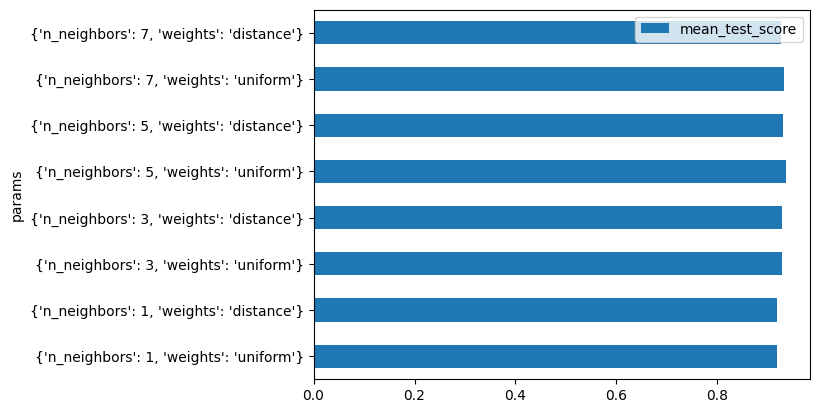

In [ ]:
# visualise the result
results.loc[:,['params','mean_test_score']].plot.barh(x = 'params')

In [ ]:
from sklearn import model_selection

# Set up the grid search with scoring on R^2 and number of folds = 10
gscv_r2 = model_selection.GridSearchCV(estimator=knn, param_grid=grid, scoring='r2', cv=10)

# Convert the results dictionary to a dataframe
results_r2 = pd.DataFrame(gscv_r2.cv_results_)
# convert the results dictionary to a dataframe
# results = pd.DataFrame(gscv.cv_results_)

# Display the top 5 models based on mean test scores for R^2
print(
results_r2.loc[:, ['params', 'mean_test_score']].sort_values('mean_test_score', ascending=False).head(5)
)

In [ ]:
from sklearn import datasets, svm, model_selection

In [ ]:
# load data
digits = datasets.load_digits()
# target
y = digits.target
# features
X = digits.data

In [ ]:
# support vector machine classifier
clr = svm.SVC(gamma='scale')
?clr

In [ ]:
# hyperparameter grid. contains linear and polynomial kernels
grid = [
  {'kernel': ['linear']},
 {'kernel': ['poly'], 'degree': [2, 3, 4]}
 ]

In [ ]:
# setting up the grid search to score on accuracy and evaluate over 10 folds
cv_spec = model_selection.GridSearchCV(estimator=clr, param_grid=grid, scoring='accuracy', cv=10)

In [ ]:
# start the grid search
cv_spec.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'kernel': ['linear']},
                         {'degree': [2, 3, 4], 'kernel': ['poly']}],
             scoring='accuracy')

In [ ]:
# what is the available information
print(cv_spec.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_kernel', 'param_degree', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [ ]:
import pandas as pd
# convert the dictionary of results to a pandas dataframe
results = pd.DataFrame(cv_spec.cv_results_)
print(
# show hyperparameterizations
results.loc[:,['params','mean_test_score']].sort_values('mean_test_score', ascending=False)
)

                            params  mean_test_score
2  {'degree': 3, 'kernel': 'poly'}         0.977734
3  {'degree': 4, 'kernel': 'poly'}         0.973284
1  {'degree': 2, 'kernel': 'poly'}         0.970500
0             {'kernel': 'linear'}         0.960487


<Axes: ylabel='params'>

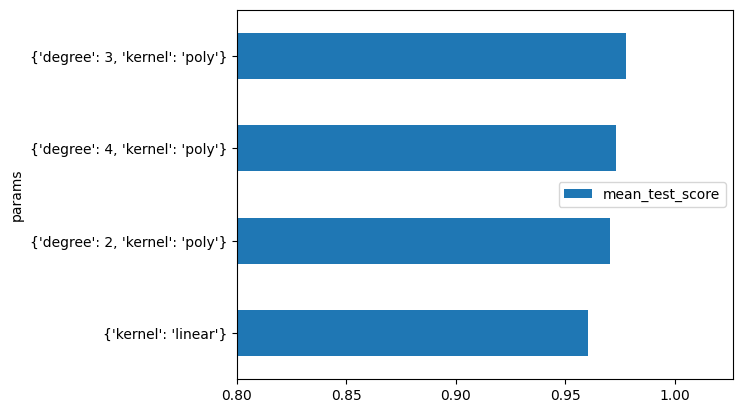

In [ ]:
# visualize the result
(
    results.loc[:,['params','mean_test_score']]
    .sort_values('mean_test_score', ascending=True)
    .plot.barh(x='params', xlim=(0.8))
)

# Random Search

In [ ]:
# list of all xs
X = list(range(1, 11))
print(X)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
# pmf, 1/n * n = 1
p_X_x = [1/len(X)] * len(X)
# sums to 1
print(p_X_x)

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


<BarContainer object of 10 artists>

Text(0.5, 0, 'X')

Text(0, 0.5, 'P(X=x)')

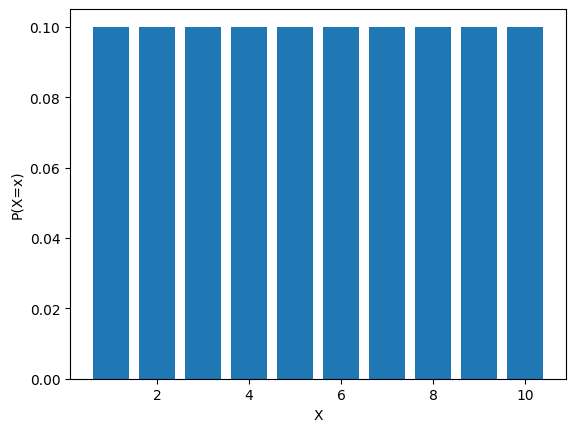

In [ ]:
import matplotlib.pyplot as plt
plt.bar(X, p_X_x)
plt.xlabel('X')
plt.ylabel('P(X=x)')

In [ ]:
import numpy as np
# range of xs
x = np.linspace(-10, 10, 100)

In [ ]:
import scipy.stats as stats
# first normal distribution with mean = 0, variance = 1
p_X_1 = stats.norm.pdf(x=x, loc=0.0, scale=1.0**2)
# second normal distribution with mean = 0, variance = 2.25
p_X_2 = stats.norm.pdf(x=x, loc=0.0, scale=1.5**2)

Text(0.5, 0, 'X')

Text(0, 0.5, 'P(X)')

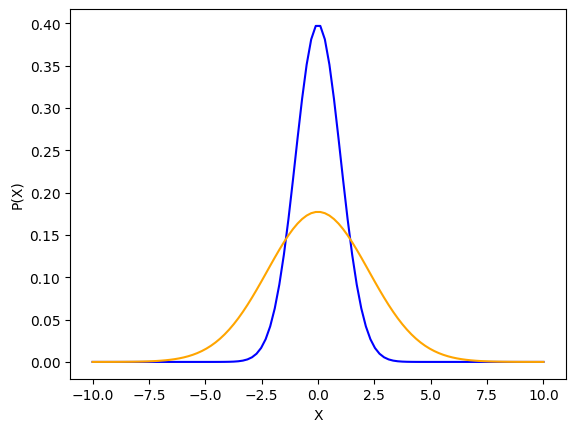

In [ ]:
plt.plot(x,p_X_1, color='blue')
plt.plot(x, p_X_2, color='orange')
plt.xlabel('X')
plt.ylabel('P(X)')

In [ ]:
from sklearn import datasets, linear_model, model_selection
# load the data
diabetes = datasets.load_diabetes()
# target
y = diabetes.target
# features
X = diabetes.data

In [ ]:
# the first patient has index 0
print(y[0])

151.0


In [ ]:
# let's look at the first patients data
print(
  dict(zip(diabetes.feature_names, X[0]))
)

{'age': 0.038075906433423026, 'sex': 0.05068011873981862, 'bmi': 0.061696206518683294, 'bp': 0.0218723855140367, 's1': -0.04422349842444599, 's2': -0.03482076283769895, 's3': -0.04340084565202491, 's4': -0.002592261998183278, 's5': 0.019907486170462722, 's6': -0.01764612515980379}


Text(0.5, 0, 'alpha')

Text(0, 0.5, 'P(alpha)')

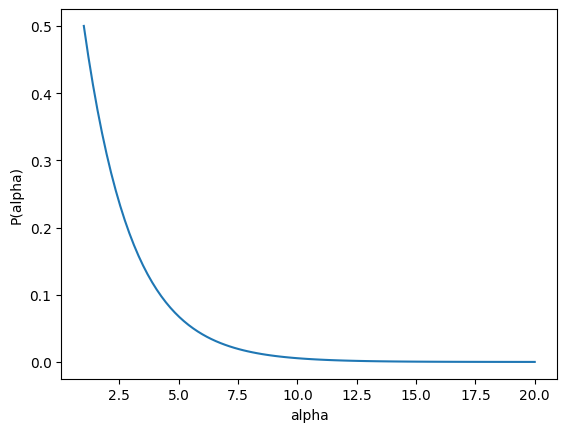

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
# values of alpha
x = np.linspace(1, 20, 100)
# probabilities
p_X = stats.gamma.pdf(x=x, a=1, loc=1, scale=2)
plt.plot(x,p_X)
plt.xlabel('alpha')
plt.ylabel('P(alpha)')

In [ ]:
# n sample values
n_iter = 100
# sample from the gamma distribution
samples = stats.gamma.rvs(a=1, loc=1, scale=2, size=n_iter, random_state=100)

(array([47., 21., 10.,  9.,  4.,  2.,  2.,  3.,  1.,  1.]),
 array([ 1.00946005,  1.97816725,  2.94687445,  3.91558165,  4.88428885,
         5.85299606,  6.82170326,  7.79041046,  8.75911766,  9.72782486,
        10.69653206]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'alpha')

Text(0, 0.5, 'sample count')

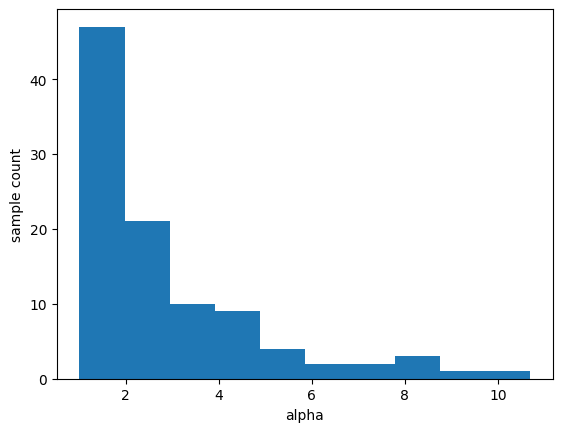

In [ ]:
# visualize the sample distribution
plt.hist(samples)
plt.xlabel('alpha')
plt.ylabel('sample count')

In [ ]:
# we will store the results inside a dictionary
result = {}
# for each sample
for sample in samples:

  # initialize a ridge regression estimator with alpha set to the sample value
  reg = linear_model.Ridge(alpha=sample)

  # conduct a 10-fold cross validation scoring on negative mean squared error
  cv = model_selection.cross_val_score(reg, X, y, cv=10, scoring='r2')

  # retain the result in the dictionary
  result[sample] = [cv.mean()]

In [ ]:
import pandas as pd
# convert the result dictionary to a pandas dataframe, transpose and reset the index
df_result = pd.DataFrame(result).T.reset_index()
# give the columns sensible names
df_result.columns = ['alpha', 'r2']
print(df_result.sort_values('r2', ascending=False).head())

       alpha        r2
4   1.009460  0.404749
26  1.011409  0.404612
29  1.030745  0.403254
43  1.041302  0.402515
34  1.074316  0.400217


Text(0.5, 0, 'alpha')

Text(0, 0.5, 'R2')

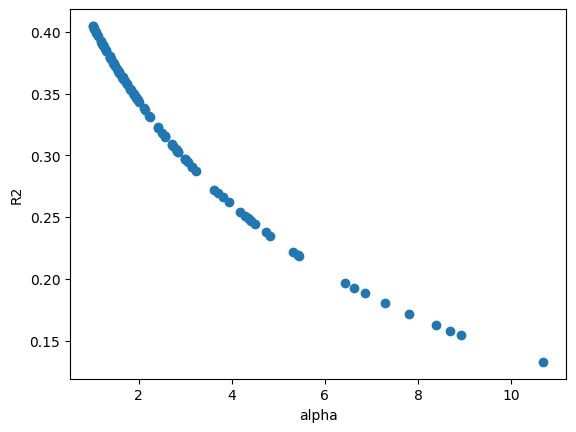

In [ ]:
plt.scatter(df_result.alpha, df_result.r2)
plt.xlabel('alpha')
plt.ylabel('R2')

In [ ]:
from sklearn import datasets, model_selection, linear_model
# load the data
diabetes = datasets.load_diabetes()
# target
y = diabetes.target
# features
X = diabetes.data
# initialise the ridge regression
reg = linear_model.Ridge()

In [ ]:
?reg

In [ ]:
from scipy import stats
# alpha ~ gamma(1,1)
param_dist = {'alpha': stats.gamma(a=1, loc=1, scale=2)}

In [ ]:
# set up the random search to sample 100 values and score on negative mean squared error
rscv = model_selection.RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=100, scoring='r2')
# start the search
rscv.fit(X,y)

RandomizedSearchCV(estimator=Ridge(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a884cd709d0>},
                   scoring='r2')

In [ ]:
import pandas as pd
# convert the results dictionary to a pandas data frame
results = pd.DataFrame(rscv.cv_results_)
# show the top 5 hyperparamaterizations
print(results.loc[:,['params','rank_test_score']].sort_values('rank_test_score').head(5))

                           params  rank_test_score
46  {'alpha': 1.0040535314588923}                1
26  {'alpha': 1.0802077592683086}                2
7   {'alpha': 1.1006751417423362}                3
74  {'alpha': 1.1315273010176654}                4
3   {'alpha': 1.1339450489560783}                5


In [ ]:
#  I assume gamma b/c gamma covers a lot of "shapes"
param_dist = {'param_name': stats.uniform(loc=start, scale=end-start)}
param_dist = {'param_name': stats.norm(loc=mean, scale=std)}
param_dist = {'param_name': stats.expon(loc=loc, scale=scale)}
param_dist = {'param_name': stats.bernoulli(p=probability_of_1)}
param_dist = {'param_name': stats.poisson(mu=mean_value)}



In [ ]:
from sklearn import datasets
# import data
digits = datasets.load_digits()
# target
y = digits.target
# features
X = digits.data

In [ ]:
from sklearn import ensemble
# an ensemble of 100 estimators
rfc = ensemble.RandomForestClassifier(n_estimators=100, random_state=100)

In [ ]:
?rfc

In [ ]:
# how many features do we have in our dataset?
n_features = X.shape[1]
print(n_features)

64


In [ ]:
from scipy import stats
# we would like to sample from criterion and max_features as discrete uniform distributions
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_features': stats.randint(low=1, high=n_features)
}

In [ ]:
from sklearn import model_selection
# setting up the random search sampling 50 times and conducting 5-fold cross-validation
rscv = model_selection.RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy' , random_state=100)

In [ ]:
# start the process
rscv.fit(X,y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a884cd73b20>},
                   random_state=100, scoring='accuracy')

In [ ]:
import pandas as pd
# convert the dictionary of results to a pandas dataframe
results = pd.DataFrame(rscv.cv_results_)
# removing duplication
distinct_results = results.loc[:,['params','mean_test_score']]
# convert the params dictionaries to string data types
distinct_results.loc[:,'params'] = distinct_results.loc[:,'params'].astype('str')
# remove duplicates
distinct_results.drop_duplicates(inplace=True)
# look at the top 5 best hyperparamaterizations
distinct_results.sort_values('mean_test_score', ascending=False).head(5)

,params,mean_test_score
3,"{'criterion': 'gini', 'max_features': 11}",0.940470
48,"{'criterion': 'gini', 'max_features': 4}",0.939913
19,"{'criterion': 'gini', 'max_features': 5}",0.937700
14,"{'criterion': 'gini', 'max_features': 3}",0.937694
21,"{'criterion': 'entropy', 'max_features': 8}",0.936582


<Axes: ylabel='params'>

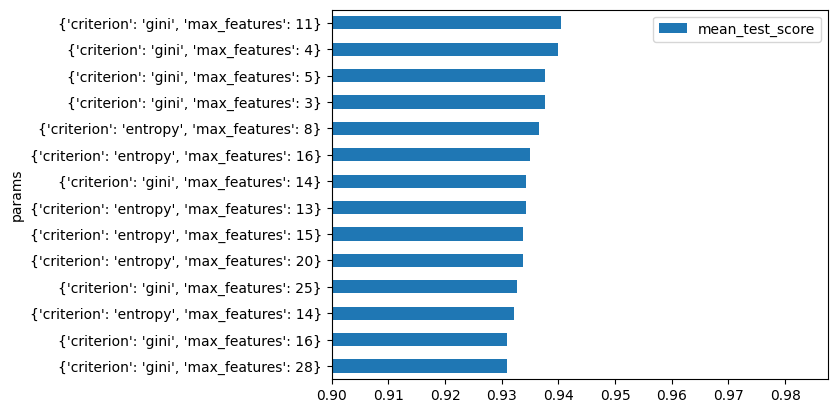

In [ ]:
# top performing models
distinct_results[distinct_results.mean_test_score > 0.93].sort_values('mean_test_score').plot.barh(x='params', xlim=(0.9))

In [ ]:
Is the Mushroom Poisonous?
Imagine you are a data scientist working for the biology department at your local university. Your colleague who is a mycologist
 (a biologist who specializes in fungi) has requested that you help her develop a machine learning model capable of discerning whether a
 particular mushroom species is poisonous or not given attributes relating to its appearance.

The objective of this activity is to employ the grid and randomized search strategies to find an optimal model for this purpose.

https://raw.githubusercontent.com/fenago/datasets/main/mushrooms.csv
or
https://raw.githubusercontent.com/fenago/datasets/main/agaricus-lepiota.data

1. Load the data into Python using the pandas.read_csv() method, calling the object mushrooms.
Hint: The dataset is in CSV format and has no header. Set header=None in pandas.read_csv().

2. Separate the target, y and features, X from the dataset.
Hint: The target can be found in the first column (mushrooms.iloc[:,0]) and the features in the remaining columns (mushrooms.iloc[:,1:]).

3. Encode the target, y, so that poisonous mushrooms are represented as 1 and edible mushrooms as 0.
Transform the columns of the featureset X into a numpy array with a binary representation. This is known as one-hot encoding.
Hint: Use preprocessing.OneHotEncoder() to transform X.

4. Conduct both a grid and random search to find an optimal hyperparameterization for a random forest classifier. Use accuracy as your method of model evaluation. Make sure that when you initialize the classifier and when you conduct your random search, random_state = 100.
For the grid search, use the following:

{
    'criterion': ['gini', 'entropy'],
    'max_features': [2, 4, 6, 8, 10, 12, 14]
}


For the randomized search, use the following:

{
    'criterion': ['gini', 'entropy'],
    'max_features': stats.randint(low=1, high=max_features)
}


Plot the mean test score versus hyperparameterization for the top 10 models found using random search.

****HINT:    https://drlee.io/kickstart-your-binary-classification-project-with-this-python-template-77ca1fa78d66